In [ ]:
!find / -name "*.png"

find: ‘/proc/61/task/61/net’: Invalid argument
find: ‘/proc/61/net’: Invalid argument
/opt/nvidia/nsight-compute/2023.2.2/docs/NsightCompute/graphics/occupancy-calculator-tables.png
/opt/nvidia/nsight-compute/2023.2.2/docs/NsightCompute/graphics/profiler-report-header-filter-dialog.png
/opt/nvidia/nsight-compute/2023.2.2/docs/NsightCompute/graphics/quick-start-system-trace-options.png
/opt/nvidia/nsight-compute/2023.2.2/docs/NsightCompute/graphics/tool-window-nvtx-resources.png
/opt/nvidia/nsight-compute/2023.2.2/docs/NsightCompute/graphics/profiler-report-pages-summary.png
/opt/nvidia/nsight-compute/2023.2.2/docs/NsightCompute/graphics/occupancy-calculator-activity.png
/opt/nvidia/nsight-compute/2023.2.2/docs/NsightCompute/graphics/profiler-report-pages-section-with-rule.png
/opt/nvidia/nsight-compute/2023.2.2/docs/NsightCompute/graphics/profiler-report-pages-callstack.png
/opt/nvidia/nsight-compute/2023.2.2/docs/NsightCompute/graphics/profiler-report-pages-source.png
/opt/nvidia/nsig

In [ ]:
filepath = "/opt/nvidia/nsight-compute/2023.2.2/docs/ProfilingGuide/graphics/roofline-analysis.png"

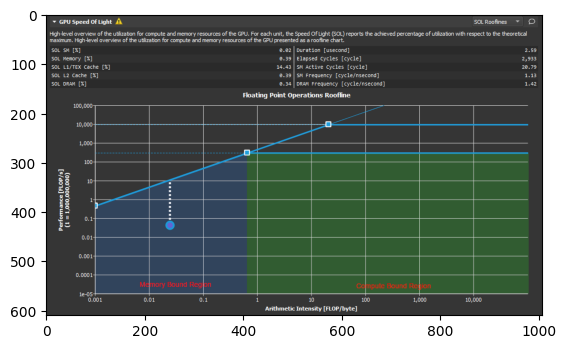

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 処理対象のPNGファイルパス
filepath = "/opt/nvidia/nsight-compute/2023.2.2/docs/ProfilingGuide/graphics/roofline-analysis.png"

# 画像を読み込み
img = cv2.imread(filepath)

# 描画用にRGBに変換
show_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# 画像を表示
plt.imshow(show_img)

In [ ]:
!pip install pypng

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 1.7 MB/s eta 0:00:00


In [ ]:
from png import Reader

# PNGファイルを開く
with open(filepath, "rb") as f:
    # PNGリーダーを作成
    r = Reader(f)

    # ヘッダー情報を読み込む
    x = r.read()

    # メタ情報を表示
    print(f"Width: {x[0]}")
    print(f"Height: {x[1]}")
    print(f"info: {x[3]}")


Width: 1007
Height: 610
info: {'greyscale': False, 'alpha': True, 'planes': 4, 'bitdepth': 8, 'interlace': 0, 'size': (1007, 610), 'background': (2, 189, 8), 'physical': _Resolution(x=3780, y=3780, unit_is_meter=True)}


In [ ]:
def dump(body):
    print("         0  1  2  3  4  5  6  7  8  9  A  B  C  D  E  F")
    ascii = ""
    i = 0
    l = 0
    print(f"{l:08X}:", end="")
    for byte in body:
        print(f"{byte:02X} ", end="")
        if byte >= 0x20 and byte <= 0x7e:
            ascii += chr(byte)
        else:
            ascii += '.'
        i += 1
        if i == 16:
            print(" ",ascii)
            ascii = ""
            i = 0
            l += 16
            print(f"{l:08X}:", end="")
    if i != 0:
        print("   "*(16-i),end="")
        print(" ",ascii)

def dump2(filepath):
    with open(filepath, "rb") as f:
        body = f.read()
        dump(body)


In [ ]:
dump2(filepath)

         0  1  2  3  4  5  6  7  8  9  A  B  C  D  E  F
00000000:89 50 4E 47 0D 0A 1A 0A 00 00 00 0D 49 48 44 52   .PNG........IHDR
00000010:00 00 03 EF 00 00 02 62 08 06 00 00 00 B6 23 F3   .......b......#.
00000020:97 00 00 22 8A 7A 54 58 74 52 61 77 20 70 72 6F   ...".zTXtRaw pro
00000030:66 69 6C 65 20 74 79 70 65 20 65 78 69 66 00 00   file type exif..
00000040:78 DA AD 9C 69 72 5C B9 B2 A4 FF 63 15 BD 04 CC   x...ir\....c....
00000050:C3 72 30 9A BD 1D F4 F2 FB 73 9C 24 99 A4 A8 7B   .r0......s.$...{
00000060:AB DA 5E A9 24 52 C9 4C 0C 31 78 B8 07 70 64 F6   ..^.$R.L.1x..pd.
00000070:FF FD 9F 63 FE 0F FF D5 16 A2 89 A9 D4 DC 72 B6   ...c..........r.
00000080:FC 17 5B 6C BE F3 4D B5 CF 7F ED FE E9 6C BC 7F   ..[l..M......l..
00000090:DE FF F6 B1 E1 F5 EA B7 D7 4D F6 D6 DF EF 3C 2F   .........M....</
000000A0:E9 2D CF DB 6C E9 CF 57 D7 79 3D 7D 7D E0 63 0E   .-..l..W.y=}}.c.
000000B0:37 BE BF 6E EA EB 27 BE BE 06 7A FD E0 63 C0 A0   7..n..'...z..c..
000000C0:99 35 D5 7A 5F 24 AF FB

In [ ]:
import struct
import binascii

filepath = '/opt/nvidia/nsight-compute/2023.2.2/docs/ProfilingGuide/graphics/roofline-analysis.png'

chunks = []
with open(filepath, "rb") as f:
    signature = f.read(8)

    while True:
        length, name = struct.unpack(">L4s",f.read(8))
        data = f.read(length)
        CRC = struct.unpack(">L",f.read(4))[0]
        chunks.append([length,name,data,CRC])
        if name == b'IEND':
            break

for chunk in chunks:
    crc = binascii.crc32(chunk[1]+chunk[2])
    print(f"{chunk[1]}: {chunk[0]} byte, CRC32:{chunk[3]:08X},{crc:08X}")



b'IHDR': 13 byte, CRC32:B623F397,B623F397
b'zTXt': 8842 byte, CRC32:47F32BA6,47F32BA6
b'iCCP': 389 byte, CRC32:97769273,97769273
b'bKGD': 6 byte, CRC32:40DE0D6E,40DE0D6E
b'pHYs': 9 byte, CRC32:952B0E1B,952B0E1B
b'tIME': 7 byte, CRC32:E46C8621,E46C8621
b'IDAT': 8192 byte, CRC32:64251E24,64251E24
b'IDAT': 8192 byte, CRC32:97964230,97964230
b'IDAT': 8192 byte, CRC32:64BAACEB,64BAACEB
b'IDAT': 8192 byte, CRC32:979B1574,979B1574
b'IDAT': 8192 byte, CRC32:E8D90928,E8D90928
b'IDAT': 4419 byte, CRC32:64A163D7,64A163D7
b'IEND': 0 byte, CRC32:AE426082,AE426082


In [ ]:
for chunk in chunks:
    if chunk[1]==b'IHDR':
        header = struct.unpack(">2L5B", chunk[2])
        print(f"Width: {header[0]}")
        print(f"Height: {header[1]}")
        print(f"Bit depth: {header[2]}")
        print(f"Color type: {header[3]}, ", end="")
        if header[3]==0:
            print("Grayscale")
        elif header[3]==2:
            print("RGB")
        elif header[3]==3:
            print("Palette index")
        elif header[3]==4:
            print("Grayscale with alpha")
        elif header[3]==6:
            print("RGB with alpha")
        else:
            print("Unknown")
        print(f"Compression method: {header[4]}")
        print(f"Filter method: {header[5]}")
        print(f"Interlace method: {header[6]}")


Width: 1007
Height: 610
Bit depth: 8
Color type: 6, RGB with alpha
Compression method: 0
Filter method: 0
Interlace method: 0


In [ ]:
import zlib

for chunk in chunks:
    if chunk[1]==b'zTXt':
        keyword = chunk[2].split(b"\x00", 1)[0]
        l = len(keyword)
        print(keyword)
        print(zlib.decompress(chunk[2][l+2:]).decode(encoding='latin-1'))


b'Raw profile type exif'

exif
    8934
45786966000049492a000800000009000001040001000000ef0300000101040001000000
6202000002010300030000007a0000001a01050001000000800000001b01050001000000
88000000280103000100000003000000310102000d000000900000003201020014000000
9e0000006987040001000000b2000000c4000000080008000800bd00000005000000bd00
00000500000047494d5020322e31302e31380000323032303a30343a31342031343a3233
3a343700010001a003000100000001000000000000000800000104000100000000010000
01010400010000009b00000002010300030000002a010000030103000100000006000000
060103000100000006000000150103000100000003000000010204000100000030010000
0202040001000000b021000000000000080008000800ffd8ffe000104a46494600010100
000100010000ffdb004300080606070605080707070909080a0c140d0c0b0b0c1912130f
141d1a1f1e1d1a1c1c20242e2720222c231c1c2837292c30313434341f27393d38323c2e
333432ffdb0043010909090c0b0c180d0d1832211c213232323232323232323232323232
323232323232323232323232323232323232323232323232323232323232323232323232
ffc00011080

In [ ]:
from PIL import PngImagePlugin

def get_metadata(path: str):
    img = PngImagePlugin.PngImageFile(path)
    info = img.info
    for key, value in info.items():
        print(f'{key}: {value}')

get_metadata(filepath)

Raw profile type exif: 
exif
    8934
45786966000049492a000800000009000001040001000000ef0300000101040001000000
6202000002010300030000007a0000001a01050001000000800000001b01050001000000
88000000280103000100000003000000310102000d000000900000003201020014000000
9e0000006987040001000000b2000000c4000000080008000800bd00000005000000bd00
00000500000047494d5020322e31302e31380000323032303a30343a31342031343a3233
3a343700010001a003000100000001000000000000000800000104000100000000010000
01010400010000009b00000002010300030000002a010000030103000100000006000000
060103000100000006000000150103000100000003000000010204000100000030010000
0202040001000000b021000000000000080008000800ffd8ffe000104a46494600010100
000100010000ffdb004300080606070605080707070909080a0c140d0c0b0b0c1912130f
141d1a1f1e1d1a1c1c20242e2720222c231c1c2837292c30313434341f27393d38323c2e
333432ffdb0043010909090c0b0c180d0d1832211c213232323232323232323232323232
323232323232323232323232323232323232323232323232323232323232323232323232
ffc0001108009

In [ ]:
body = """
45786966000049492a000800000009000001040001000000ef0300000101040001000000
6202000002010300030000007a0000001a01050001000000800000001b01050001000000
88000000280103000100000003000000310102000d000000900000003201020014000000
9e0000006987040001000000b2000000c4000000080008000800bd00000005000000bd00
00000500000047494d5020322e31302e31380000323032303a30343a31342031343a3233
3a343700010001a003000100000001000000000000000800000104000100000000010000
01010400010000009b00000002010300030000002a010000030103000100000006000000
060103000100000006000000150103000100000003000000010204000100000030010000
0202040001000000b021000000000000080008000800ffd8ffe000104a46494600010100
000100010000ffdb004300080606070605080707070909080a0c140d0c0b0b0c1912130f
141d1a1f1e1d1a1c1c20242e2720222c231c1c2837292c30313434341f27393d38323c2e
333432ffdb0043010909090c0b0c180d0d1832211c213232323232323232323232323232
323232323232323232323232323232323232323232323232323232323232323232323232
ffc0001108009b010003012200021101031101ffc4001f00000105010101010101000000
00000000000102030405060708090a0bffc400b510000201030302040305050404000001
7d01020300041105122131410613516107227114328191a1082342b1c11552d1f0243362
7282090a161718191a25262728292a3435363738393a434445464748494a535455565758
595a636465666768696a737475767778797a838485868788898a92939495969798999aa2
a3a4a5a6a7a8a9aab2b3b4b5b6b7b8b9bac2c3c4c5c6c7c8c9cad2d3d4d5d6d7d8d9dae1
e2e3e4e5e6e7e8e9eaf1f2f3f4f5f6f7f8f9faffc4001f01000301010101010101010100
00000000000102030405060708090a0bffc400b511000201020404030407050404000102
77000102031104052131061241510761711322328108144291a1b1c109233352f0156272
d10a162434e125f11718191a262728292a35363738393a434445464748494a5354555657
58595a636465666768696a737475767778797a82838485868788898a9293949596979899
9aa2a3a4a5a6a7a8a9aab2b3b4b5b6b7b8b9bac2c3c4c5c6c7c8c9cad2d3d4d5d6d7d8d9
dae2e3e4e5e6e7e8e9eaf2f3f4f5f6f7f8f9faffda000c03010002110311003f00e0ac8e
9fb6317826ff005abbcc4573e5f3bb00ff00174c76ad761e1169a348df5548c901a49046
70369cb607fb58e39e01e7349a6a5a4da308a77d211cf02498b09501739ce07cdc2f1d30
0f5a5bd7853ccc0d08f9eeb978779f2d41539c672067a8c13d71c50808d8785564f924d5
1d32321a38d4e3233fc479c6efd2a58c7845ee242cfa9450a7280aa12e02ae41c7424eef
6c62a736f609318bed1a010b1b48ae44987eb80486e081dbaf03ae4d3161b7492058aeb4
05dcc8efb83950583000e73c0ce4fa1c67a5202928f0feebdc3dc8431016be628ddbf192
5b0718dc31df83eb593fbbff0066ba10b6d1c72ce8de1f6ddc185bcc247fbb93edebde92
6168b26e864d163921732e36b61b62abec1f330209240cf5c1e79c54a8d9b77dc7739ffd
dffb347eeffd9ae9a3b1b211890dd68459993cc572d943c02170d86190493ee4f0318866
fb1209d76688c61559542ef21fae57706196e178031ce78e6aae239ffddffb347eeffd9a
e8c5bc1b8b97f0f3111f1197703a8c721ba927d7eb80294dbe9eb7b1ee9b4331f9b18050
c857690fbb72e73fddfe20010bcf24d00737fbbff668fddffb35d0ac16af0432f99e1f42
e41f2c99723e5070dcf1fe3de8b58e291e568e6d022dae8db642d861b40c0dddb9c919ea
3f0a6073dfbbff00668fddff00b35d328862b2bc2a7c32720b852199c6140c21273cf5c7
5c93f4aad1dbd99b161f6ad28cf6b21252542a645505b68756f9813c67a9e99c0140185f
bbff00668fddff00b35d1cf6da7978cc171a39dc4868d959562e09ce779ddd0773c9c0a7
9b4b542ce6ebc3ceb3b2e5033908406008c60a8e4679ea280399fddffb347eeffd9ae964
4b6c7960787cba3a42d36f61b8e17f7800206de79e3b1e3b06d93594d6d6f25f3e9022b6
8d8ac2a856498f4f988eff002f5e4f4c820e695c0e73f77fecd1fbbff66ba3b730c2248f
cdd01c83b848e9b9586c0c7191b81e71d07248edc66dc6a10417570834eb098657638c90
3000e3071838ce3a8cf5eb960677eeff00d9a3f77fecd59fed450e1bfb36c700e4af96d8
23238fbd9c71f5e7ad3d3578d2331ff64e9c548e7723939e79ceecf7fa7038a00a7fbbff
00668fddff00b3571756855813a4d815030136be09f53f367f5148bab46a31fd93a7b7ae
51f9e7fdefe540153f77fecd1fbbff0066ad5c6a90c9705edf4db5823e06cf99b201e84e
7bf438c71522eb48b8ce91a6b614a8dd1b700927fbdc9e719340147f77fecd5bb06d3848
ff006e594a6df97c9db9dd9ef9ed8a48f5558dd9d74db0258f1ba36217e80b629f16ad04
71ed6d1ec1c8180c43f5f7f9bfc3fc402c6ed03cb7ff008fb2f96d83647823f873cf1ef4
b7afa09476b117424272a92a26d033d320e7a66aa47ab88c8234db0244a2452623c74f97
af238e873d4d3d75a45575fec8d34a33efc18df83b71c1dd9c77c67a934015dded8c202a
0126796c8c1e9d0638ef4ebc6b036d1adb2309405dec78c9c0cf739e73e9f8d4a9acc69b
00d234d211b7731bf3f53bb38ff0fad65d006ad8e9ed71a4cf38d1dee42f999b95b8dbb7
080fddefb7afbe6ae5ae83a9ccd677565a2461020cef9924131da324873819c1edc6ef50
2a8da5a43269171349a74d2b8f331708f8098504719e7079e9d0f7ed35adad9abd919748
b99cbb0de9e611e68f2d7217073bb73023d77018343029cba65e6a5a84a2d2d554a471b3
46b2274daa370c601cf5e3d6b2b6b7afeb5d0c50476e44b73a55e2c73187c962eca37742
49c8c6487201edd08c64c7751d858ea605ce992c71188fee0cd93bb79e4303d97f51d3bd
00616d6f5fd68dadebfad3e7dad7121841588b9280f50b9e3d69987f5fd6800dadebfad1
b5bd7f5a30febfad187f5fd6800dadebfad1b5bd7f5a30febfad187f5fd6800dadebfad1
b5bd7f5a30febfad187f5fd6800dadebfad1b5bd7f5a30febfad187f5fd6800dadebfad7
5b6ba532de7cfe1e68bcb689cc9f6a2563c8ea33f781eb8f5e33dab96b628975134ea648
4383220382cb9e47e55d258d84297c42e91761e278492f364c478392063afdefcc6075a0
065ae913cd650cb1f875a40b0b48f335d101c041f301918c120e39cf4a92e34a9a0bbb78
7fe11e68e5330203dc872ca8aa5948185e4302491dfd8d554b28fec966e349b9cbc6c5e5
49b1e67c8c4e0738c000e3be08ef52c96018930e81a8c73124214490007cb041009273bb
e6ebc03de8b85894e9be5581b89bc3459238e3792617a40239248038f987619c62a0b9d2
6f6f2d952cf47583073f24c1c9c3b21e49cf52063fd9cf7a6c56b661a249749bcddb1199
4e54bf383b72dce495edc93c014ab649279cd26977cca4fc809395ced009c9e01218648c
73ed4018b776175613986e53cb906415dc0f4254f4f706a0dadebfad7417ba787b62b0e8
da94730de10ba39030e0e3af65dc0fb9ac6b8b0bcb30a6e619212c4a8120da72002783cf
71f9d0041b5bd7f5a36b7afeb461fd7f5a30febfad001b5bd7f5a36b7afeb461fd7f5a30
febfad001b5bd7f5a36b7afeb461fd7f5a30febfad001b5bd7f5a36b7afeb461fd7f5a30
febfad0059b0b39eeee824503dc6c1e63c68d82ca39383f4fad6a6a360d6b611b9d19ad7
320ff483705f76431031d318c73fecfd6b3f49f286a510b88249d58ed58e36218b1e9820
8c73566e23b73a7acb058491664044cd26ec83bfe5c67d57838fe134005b5cdbc561344f
3ea29336fd8b048a2239500641e7a839f6c54c6f2c96d51e2b9d616f224c464ca9b01da0
1c1ea0647e400acba96dede5ba9d2085774afc2ae40c9f4e7bd302d5d5d23e9b008ae2e3
ed9198f765db6f01b95c9ea32a3a0c1ce320d66cb2dd5c3069a5790a8da0bb6703d39ada
4f0c6af24b24696aacd1bf96d89a3c6ec6700eec1c77c74ef8aca68dd0e19181c03823b1
e454a02b6d93d28db27a558dade87f2a36b7a1fca9815f6c9e946d93d2ac8462090a78e4
f1d2936b7a1fca802bed93d28db27a558dade87f2a36b7a1fca802bed93d28db27a55828
c3aa9fca8dade87f2a00afb64f4a36c9e95aba56a336917e9790c10cae9d16642cbf9715
b4fe3395a3089e1ed0625ddb9847638dfc1001c9e4739fad00721b64f4ae860bfb15ba0c
d77ab796ad194123a91c750c01e467918fc8f5ab6de2c31de34b67a269b0c24ab085e00e
15828190463d33ebc9e4f5a078b646d496ea4d1349f2f6947823b50aaca5813ebcf1d79e
a78a00cd8e7d33ecb0acb2eafe6a47b582c89b01e9f2fa0e5ff3edcd3ed2fed022c57177
ac471a8523ca9d48cf978385edf30007fb3c76cd5c8fc572c73090687a270db82fd84601
e3df3dbd7b9f6c497fe2f96fed6581f40d0e379376f9a3b2c4a490467712483939cfa8fa
8a00cc96ead0c25e0bad556e122558cc92ae320f418e8338207b7d2a47bcb3dacaf79a94
8ac48645932a46ecf4247627fe059ed5abff0009cdd2ce274d074349c74956cc861c6339
dd597acebd36b593269ba7db3190c8cf6b6db1989cf53927bd0037edf665645373ac8004
823fdf29ce71b777a7be3ae07e0c9e6d32e237065d4ddc2b18fed122b283b303a739c851
f4c7a566ec6c6769c7d29446e54b046207538e94582e56db27a51b64f4ab1b5bd0fe546d
6f43f950057db27a51b64f4ab251d58ab2b0238208e949b5bd0fe54015f6c9e946d93d2a
c6d6f43f952ec7da5b6b601c138a00adb64f4a36c9e95636b7a1fca8dade87f2a0065b13
1ddc2f2195635752c62203819e769f5f4abf717114b61127dab509ae0302c2623ca0307a
0c939e47eb54f6b7a1fca92800a0123a5145003ccb21001918e3a7353ea1ff001f29ff00
5c21ff00d16b57d7c53aca48ee976aad23ef62214e5b18ce31c71e9515eea57a93a2addc
c079311c6f3ff3cd68f51197455bfed5bfff009fc9bfefb347f6adff00fcfe4dff007d9a
7a06a430ff00aa9ffeb98ffd096a2ad08b54be31ce4ddcdc2647ce7fbc2a2fed5bff00f9
fc9bfefb34681a9528ab7fdab7ff00f3f937fdf668fed4bfff009fc9bfefb34681a95e6f
be3fdd5fe429957e5d52fc38c5dcdf757f8cfa0a8ffb56ff00fe7f26ff00becd1a06a54a
51d0fd2ad7f6adff00fcfe4dff007d9a51aa5fe0ff00a64dd3fbe68d03529d156ffb56ff
00fe7f26ff00becd3e3d435395b6c77370ede8ac49a12b8376d59469cffeb1bea6b4fed3
7d1ffc7c6a4f1ffb21cbb7e43fa914afad4d13308a49dc83f7a590fe8a3fae6af92df13b
11ed2ff0ab94ae74dbeb290477565710395dc165899491d33c8e951796abf7dc0f65f98f
f87eb5a9a9f89b52d5a6592778d48cf11c600249c93f5cd51fed0baff9ebff008e8ff0a3
f77ddfddff00045fbcecbeff00f80315d5606288321d796e7b1edd2a26767c6e62703032
7a0ab6350baf218f9bcee1fc23d0fb533fb42ebfe7affe3a3fc28f73bbfbbfe087bfd97d
ff00f00ab455afed0baff9ebff008e8ff0a3fb42ebfe7aff00e3a3fc295a1ddfddff0004
779f65f7ff00c023bcff008feb8ffae8dfcea1abf777f72b793a897812301f28f5a8bfb4
2ebfe7affe3a3fc28b43bbfbbfe085e7d97dff00f00ab53aff00c78cbff5d13f9353ff00
b42ebfe7affe3a3fc2a55bfb9fb1cade6f22441f747a35168777f77fc11de7d97dff00f0
0a1455afed0baff9ebff008e8ff0a3fb42ebfe7aff00e3a3fc28b43bbfbbfe08af3ecbef
ff008055a2ad7f685d7fcf5ffc747f8556662cc589c9272693e5e8ca8b97542514515251
ad65aa585b44165d223b86ca92eef8ce0608fbbf8ff3cd32f64533a62c626fdcc5cfcfff
003cd7fdaa874ffecccbff00690bb232367d98af4e739ddf87ebf4a7dfadb7da13324b9f
262e918ff9e6bef40bd08bcc1ff40f8bff00227ff1549e60ff00a07c5ff913ff008aa8f6
daff00cf49bfefd8ff00e2a8db6bff003d26ff00bf63ff008aa7a06a598a41e5cffe8110
f93fe9a7f787fb551ef1ff0040f8bff227ff00154b12db7973fef26fb83fe598fef2fbd4
3b6d7fe7a4dff7ec7ff154681a92f983fe81f17fe44ffe2a93cc1ff40f8bff00227ff155
1edb5ff9e937fdfb1ffc55284b6270249893ff004cc7ff00154681a93cae378ff897c5f7
57fe7a7a0ff6a99bc7fd03e2ff00c89ffc55597d3a3dc0cb2bc0368ff58801e83f8739fd
29a90e9f193b8cd311d32a157f100e7f515aaa327bab193acba3bfa7f561da759cda9dea
5a5b69f6fe632b365ddd400aa58924b7a035624d2ae2de59239ec204d8c5495323e483db
6b1a6c37cd6d207b5b99ad88e8605087f30727f1a73bc7348f24934cf2392ccccb9249ea
49cd4d470a56babfe0653a953a59113c4aab88b46959b8f9dd6403fef9c9fe74492df489
b0e97b63fee24722afe40d3f107f7e4ffbe07f8d1883fbf27fdf03fc6b2facad92b7cffe
010a52ddd9ff005ea55f267ffa047fe392ff00f154af0cfbdbfe251dff00b92fff001556
7107f7e4ff00be07f8d2b08379f9e4ebfdc1fe353eda3dbf1ff805fb69f97f5f32a7933f
fd023ff1c97ff8aa3c99ff00e811ff008e4bff00c555ac41fdf93fef81fe34620fefc9ff
007c0ff1a5eda3dbf1ff00801eda7e5fd7cc80433792c3fb27f8871b65f43fed533c99ff
00e811ff008e4bff00c555c020f29be793ef0fe01efef4dc41fdf93fef81fe34fdb47b7e
3ff003db4fcbfaf9957c99ff00e811ff008e4bff00c551e4cfff00408ffc725ffe2aad62
0fefc9ff007c0ff1a3107f7e4ffbe07f8d2f6d1edf8ffc00f6d3f2febe6457514c6ee623
49dc0c8d83b64e79ff007aa2f267ff00a047fe392fff001557ae041f69972f27df3fc03d
7eb51e20fefc9ff7c0ff001a7eda3dbf1ff801eda7e5fd7ccabe4cff00f408ff00c725ff
00e2aa558a6fb1c83fb279f3138db273c37fb552e20fefc9ff007c0ff1a91441f6593e79
3efaff0000f46f7a3db47b7e3ff003db4fcbfaf9947c99ff00e811ff008e4bff00c551e4
cfff00408ffc725ffe2aad620fefc9ff007c0ff1a3107f7e4ffbe07f8d2f6d1edf8ffc00
f6d3f2febe655f267ffa047fe392ff00f15545c10ec0aed20f2be9ed5b1883fbf27fdf03
fc6b226c79d263a6e3fceaa3352d91ad29ca4f535bc268d278af4c4499a12675f9d7ae3b
8fc7a7e35a3e2fb18ade1b6bc30017579717266937b30252423e5ce38e7d3b0c62b23c3b
e51f10d82cf024e8f32a79720cab13c0c8f4c915bfe3308ba669c106c637379e6ae3196f
37af206eefcf38aa36397b0b16d42e84092c511233ba56217f3c54f7d6c0dc21f3e11fb9
8bab7fd335aa11c6f2c8b1c6a59dc85551d493d055ebeb4b96b8422de523c98ba21ff9e6
b4015beca3fe7e20ff00bebffad47d947fcfc41ff7d7ff005aa58b4abd989c5bba81d59c
6d03f3ab0ba608bfd624f337f76342abf9919fd2b48d293337562b4dcaf15b0f2e7fdfc3
f707f17fb4bed52c7a2dcc8c8a1a252ec1543360927a606326ad44b711a4be45a343f2f0
510eeea3f88f34585bdcb6a96acf0ca7f7c992509ee3d8ff00235a2a515bbb99ba937b2b
7f5fd77226d36deda4649a6124a870cbbb6a823a8f53fa538164188648211d3f76707f3e
a7f3a75fdadc1d46e88825c79cff00c07d4fb0fe555becb71ff3c25ffbe0d6b1b2f87421
c6ff0016bfd7dc3e4832c3f7d17dd1fc5ed4df23fe9b45ff007d53a4b5b8dc3f712fdd1f
c07d299f65b8ff009e12ff00df069142f91ff4da2ffbeaacf9039fdf45ff007d556fb2dc
7fcf097fef835645b5c73fb897fef835c78be844c4f207fcf68bfefaa3c81ff3da2ffbea
8fb35c7fcf097fef8347d9ae3fe784bff7c1ae3203c81ff3da2ffbea9cd00dc7f7d175f5
a6fd9ae3fe784bff007c1a56b6b8dc7f71275fee1a004f207fcf68bfefaa3c81ff003da2
ff00bea8fb35c7fcf097fef8347d9ae3fe784bff007c1a007880794dfbd8bef0eff5a679
03fe7b45ff007d53c5b4fe537ee24fbc3f80fbd33ecd71ff003c25ff00be0d001e40ff00
9ed17fdf547903fe7b45ff007d51f66b8ff9e12ffdf068fb35c7fcf097fef834012dc420
dccbfbd8bef9efef517903fe7b45ff007d54b716d39b9948824fbe7f80fad45f66b8ff00
9e12ff00df069830f207fcf68bfefaa95611f6593f7b17df5efecd517d9ae3fe784bff00
7c1a956da7fb2c83c893efaff01f46a008bc81ff003da2ff00bea8f207fcf68bfefaa3ec
d71ff3c25ffbe0d1f66b8ff9e12ffdf069007903fe7b45ff007d5644c313483fda3fceb5
fecd71ff003c25ff00be0d644c089a40460863fceb5a5b9bd0dd97fc3c0b78974a0b8c9b
c840cffbe2b73c657b14f69636caaa1edee6f01c48ac4832e7900e47e239ac9f0a7fc8d9
a49f292402ea3255c90300e49e08e9d7f0ab1e26ba86e1c2c5721f17772e6021818b73f7
0d1ae3200e3737e15b9d060a3bc722c91b32ba905594e0823b8aded42f948b2586de28a4
8ace2479422ee73b739ce3d0819ebc75acab3bf92c81091c6e0c89210f92095248e011eb
fe79ad1babf98491e12dff00d4c5ff002ef19fe05ff66b5a2da968655526b528bbbc8db9
d9998f763934dab5fda137f72dbff01a3ffe268fed09bfb96dff0080d1ff00f135d1a995
92218ffd5cdfee7fecc2a5d386753b418ce664e319cfcc3b60ff0023f4352c77f36c97e4
b7fb9ff3ed1ff787fb352e9f7a5ef63137d99501cf36d16091d072b4e29c9d824d455ca9
7e31a8dd0c63133f18c6393db03f90fa0aaf5a77f7a52f6410fd99909ce45b45804f51c2
d56fed09bfb96dff0080d1ff00f13434e2ec09a92b9049f787fba3f90a655c92fe6dc3e4
b7fba3fe5da3f4ff00769bfda137f72dbff01a3ffe2690cabdeac8ef4bfda137f72dbff0
1a3ffe26acfdbe6e7e4b7ffc068fff0089ae2c5f422762ad1567edf37f72dfff0001a3ff
00e268fb7cdfdcb7ff00c068ff00f89ae32342b52b7df3f5ab1f6f9bfb96ff00f80d1fff
00134e6bf9b71f92dfaffcfb47ff00c4d01a1528ab3f6f9bfb96ff00f80d1fff001347db
e6fee5bffe0347ff00c4d01a108ff52dfef0feb4cab82fe6f29be4b7fbc3fe5de3f7ff00
6699f6f9bfb96fff0080d1ff00f13406856a2acfdbe6fee5bffe0347ff00c4d1f6f9bfb9
6fff0080d1ff00f1340684773ff1f537fbe7f9d4557ae2fa617328d96ff7cffcbbc7ebfe
ed45f6f9bfb96fff0080d1ff00f13403b15aa55ff8f593fdf5fe4d527dbe6fee5bff00e0
347ffc4d4ab7d37d9a43b2dfefaffcbbc7e8dfecd00ac51a2acfdbe6fee5bffe0347ff00
c4d1f6f9bfb96fff0080d1ff00f13406856acd97fd73ff00bc6b6fedf37f72dfff0001a3
ff00e26b12625a7909c64b13c0c77ad696e6d4376328a28adce9346dae74c482059ec1de
5463e63094e240483d3b60647f9e26ba30f991e51ffd4c5fc63fe79afb532ded74878434
fa83c721283688c90a081b8e71ce0e78fd4d4b74b6de6479965ff5317fcb31fdc5ff006a
b5a3f119d4d8ad987fe79c9ff7d8ff000a330ffcf393fefb1fe14edb6dff003da5ff00bf
43ff008aa36db7fcf697fefd0ffe2aba0c874661d92fc8ff0073fbe3fbc3daa3cc3ff3ce
4ffbec7f854d1adb6c97f7b2fdcff9e43fbc3fdaa8f6db7fcf697fefd0ff00e2a900dcc3
ff003ce4ff00bec7f851987fe79c9ff7d8ff000a76db6ff9ed2ffdfa1ffc551b6dbfe7b4
bff7e87ff154c02430ee1f23fdd1fc63d07b53730ffcf393fefb1fe152c8b6db87ef65fb
a3fe590f4ff7a99b6dbfe7b4bff7e87ff15400dcc3ff003ce4ff00bec7f8559062e7e47f
fbec7f8541b6dbfe7acbff007e87ff00155642db73fbd97fefd8ff00e2ab8b17d0898dcc
5fdc7ffbec7f85198bfb8fff007d8ff0a76db6ff009eb2ff00dfa1ff00c551b6dbfe7acb
ff007e87ff00155c640dcc5fdc7ffbec7f852b18b71f91faff007c7f852edb6ff9eb2ffd
fa1ffc552b2dbee3fbd97aff00cf31ff00c550033317f71ffefb1fe14662fee3ff00df63
fc29db6dbfe7acbff7e87ff1546db6ff009eb2ff00dfa1ff00c550000c5e537c8ff787f1
8f7f6a6e62fee3ff00df63fc2a40b6fe537ef65fbc3fe598f7ff006a9bb6dbfe7acbff00
7e87ff0015400dcc5fdc7ffbec7f85198bfb8fff007d8ff0a76db6ff009eb2ff00dfa1ff
00c551b6dbfe7acbff007e87ff0015400eb8317daa5f91fef9fe31ebf4a8f317f71ffefb
1fe1535c2dbfda65ccb2e779ff009663d7fdea8f6db7fcf597fefd0ffe2a80637317f71f
fefb1fe152298becb27c8ff7d7f8c7a37b5376db7fcf597fefd0ff00e2aa455b7fb2c9fb
d97efaff00cb31e8dfed5004398bfb8fff007d8ff0a3317f71ff00efb1fe14edb6dff3d6
5ffbf43ff8aa36db7fcf597fefd0ff00e2a801b98bfb8fff007d8ff0ac997fd73e3a6e35
b1b6dbfe7acbff007e87ff001558f363ce931d371fe75ad2dcda86ec653a38ccb2a460a8
2cc14166000cfa93d05368adce93707856fc86fde41b8384dbb8e492c5411c7438e0f43f
5e29b756729923f9a0ff005310e674fee2fbd65c76773349e5c56d33c85436d5424e0e30
71e8723f31576ebfd647ff005c62ff00d016b5a37b99d4d85fb14bfdf83ff0213fc68fb1
4bfdf83ff0213fc6abd15d0645c8ece5d92fcd07dcff009ee9fde1ef51fd8a5fefc1ff00
8109fe35246f6db26fdd37dc1dff00da150ee838f91bfcff009150a4fb1d0e8457db5f8f
f90efb14bfdf83ff000213fc68fb14bfdf83ff000213fc68df6bcfee9ff3a6ee80ff0003
7b73effe1473bec0f0f1fe75f8ff00912c9672ee1f3c1f747fcb74f4fad33ec52ff7e0ff
00c084ff001a498c4400aa436073f80a82a936cc6715176bdcb1f6297fbf07fe0427f8d5
91672f3f341ff7fd3fc6b3bbd591deb8f17d0c6658fb1cbfde83feff00a7f8d1f6397fbd
07fdff004ff1aaf457193a163ec72ff7a0ff00bfe9fe34ad672ee3f341d7fe7ba7f8d56a
56fbe7eb40684ff6397fbd07fdff004ff1a3ec72ff007a0ffbfe9fe355e8a0342d0b397c
a6f9a0fbc3fe5ba7bfbd37ec72ff007a0ffbfe9fe348be4794d9df8dc3fad31bc9da71bc
9ed53cde46ce8a4afccbef24fb1cbfde83feff00a7f8d1f6397fbd07fdff004ff1a6e2db
d64fd293f7193cbe3b51cde437412fb4bef27b8b494dcca7743f7cff00cb74f5fad47f63
97fbd07fdff4ff001a75d8805ccc14b93b8f3db39aab4d3b91569f23b5d3f4658fb1cbfd
e83feffa7f8d48b692fd9641ba0fbebff2dd3d1bdea9d4abff001eb27fbebfc9a999e83f
ec72ff007a0ffbfe9fe347d8e5fef41ff7fd3fc6abd1406858fb1cbfde83feff00a7f8d6
2cc313c80e3863d0e7bd69566cbfeb9ffde35ad2dcda86ec6514515b9d269596b3730186
29679dad62c95895f001ec47be7bd3aff51b59e302d209a0704726666e003c727e959745
0049f689ff00e7b49ff7d1a3ed13ff00cf693fefa351d1401ad6ba8d9a410acf6f70f229
3e6309db120c8238cf18008ff3c66fda26ff009ed27fdf46a3a28024fb44ff00f3da4ffb
e8d4905d325c44f3349244ae0ba0908dcb9e467b557a2802ede5ea4ae86d84b0a8077299
4b7f11239f652a3f0aadf689ff00e7b49ff7d1a8e8a0093ed13ffcf693fefa34e5b9976b
033499edf31ff1a868a00d9b7d0bc4377089a0b2bd7899048af820329e8467afe1ea3d69
a9a37881f762c351f946e398dc71f8ff002aaa9acea91c691a6a578a8836aaacec028f40
33c0e052ff006cea9bb77f695e6ef5f3dbfc680275d2b5c2aaeb697b22b6d2362b367232
3a7b0fc2a7bdd3b549351db6f617d6e934a238a29770218e300e4f1f7875f5acf1ab6a2b
8dba85d0da001899b8c7e34e5d6b54594c9fda1745c9524b4a5b243061d7d0aa9fc051a0
175b41f10af999b4bafdda976c367000e7bf38efe991ea298fa2ebf19c359dee38f98025
7046739e98c03cf6aa6357d497a5fdce376ec79ad8ce739c67d79a51ac6a42258bedf73e
5af44329c6300631e980063da802d2ddc369677367776d335fac8ca25f39808c818c601c
1c1cfe7deb33ed13ff00cf693fefa34d96479a5796462d23b16663d493d4d368024fb44f
ff003da4ff00be8d58b3bb58ee01bb334916082ab21073d88e6a9d1401a7a8ea16f70633
6514d6e467cc2d3336f39e0f278aa1f689ff00e7b49ff7d1a8e8a0093ed13ffcf693fefa
35b29aae96a3e6b2b96ca282a2e180dc3ab75ef9fc2b0a8a00b13dd3bdc48d0bcb1c4589
443213b467819ef51fda27ff009ed27fdf46a3a28024fb44ff00f3da4ffbe8d46492724e
49a28a00ffd9
"""
dump(bytes.fromhex(body))


         0  1  2  3  4  5  6  7  8  9  A  B  C  D  E  F
00000000:45 78 69 66 00 00 49 49 2A 00 08 00 00 00 09 00   Exif..II*.......
00000010:00 01 04 00 01 00 00 00 EF 03 00 00 01 01 04 00   ................
00000020:01 00 00 00 62 02 00 00 02 01 03 00 03 00 00 00   ....b...........
00000030:7A 00 00 00 1A 01 05 00 01 00 00 00 80 00 00 00   z...............
00000040:1B 01 05 00 01 00 00 00 88 00 00 00 28 01 03 00   ............(...
00000050:01 00 00 00 03 00 00 00 31 01 02 00 0D 00 00 00   ........1.......
00000060:90 00 00 00 32 01 02 00 14 00 00 00 9E 00 00 00   ....2...........
00000070:69 87 04 00 01 00 00 00 B2 00 00 00 C4 00 00 00   i...............
00000080:08 00 08 00 08 00 BD 00 00 00 05 00 00 00 BD 00   ................
00000090:00 00 05 00 00 00 47 49 4D 50 20 32 2E 31 30 2E   ......GIMP 2.10.
000000A0:31 38 00 00 32 30 32 30 3A 30 34 3A 31 34 20 31   18..2020:04:14 1
000000B0:34 3A 32 33 3A 34 37 00 01 00 01 A0 03 00 01 00   4:23:47.........
000000C0:00 00 01 00 00 00 00 00

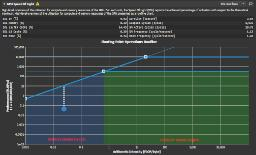

In [ ]:
from io import BytesIO
from PIL import Image

jpg = bytes.fromhex(body)[0x136:]

img = Image.open(BytesIO(jpg))

img